<a href="https://colab.research.google.com/github/shreyansh080603/GDSC_final/blob/main/GDSC_FINAL_TASK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
!pip install kaggle

In [15]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2023-11-21 01:47:18--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.35.204.214, 2600:1418:3:5b7::317f, 2600:1418:3:5a2::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.35.204.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M  82.4MB/s    in 10s     

2023-11-21 01:47:28 (79.0 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [16]:
!unzip kagglecatsanddogs_5340.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import tqdm
import random
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

In [96]:
!ls

 CDLA-Permissive-2.0.pdf      PetImages        sample_data
 kagglecatsanddogs_5340.zip  'readme[1].txt'   train


In [97]:
input_path = []
label = []

for class_name in os.listdir("PetImages"):
    for path in os.listdir("PetImages/"+class_name):
        if class_name == 'Cat':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join("PetImages", class_name, path))
print(input_path[0], label[0])

PetImages/Dog/10186.jpg 1


In [98]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,images,label
0,PetImages/Dog/9235.jpg,1
1,PetImages/Dog/1643.jpg,1
2,PetImages/Cat/3421.jpg,0
3,PetImages/Cat/8570.jpg,0
4,PetImages/Cat/7224.jpg,0


In [75]:
for i in df['images']:
    if '.jpg' not in i:
        print(i)

PetImages/Cat/Thumbs.db
PetImages/Dog/Thumbs.db


In [76]:
import PIL
l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
l

['PetImages/Cat/Thumbs.db',
 'PetImages/Dog/Thumbs.db',
 'PetImages/Dog/11702.jpg',
 'PetImages/Cat/666.jpg']

In [77]:
df = df[df['images']!='PetImages/Dog/Thumbs.db']
df = df[df['images']!='PetImages/Cat/Thumbs.db']
df = df[df['images']!='PetImages/Cat/666.jpg']
df = df[df['images']!='PetImages/Dog/11702.jpg']
len(df)

24998

In [93]:
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Dogs')
    plt.axis('off')

<Figure size 2500x2500 with 0 Axes>

In [79]:
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Cats')
    plt.axis('off')

<Figure size 2500x2500 with 0 Axes>

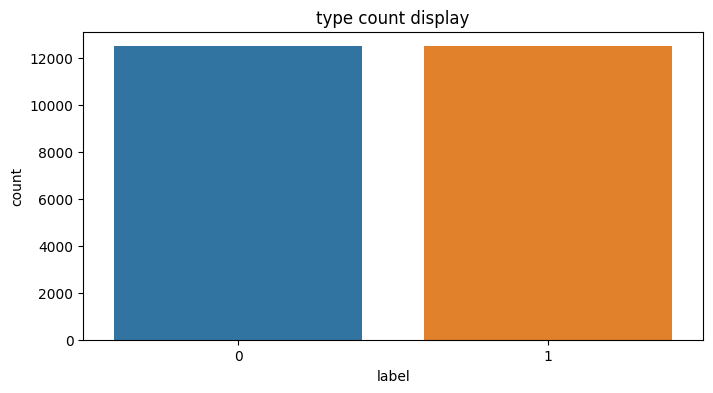

In [80]:
plt.figure(figsize=(8,4))
sns.countplot(x='label',data=df)
plt.title('type count display')
plt.show()

In [81]:
df['label'] = df['label'].astype('str')

In [82]:
df.head()

,images,label
0,PetImages/Cat/2772.jpg,0
1,PetImages/Dog/9913.jpg,1
2,PetImages/Cat/8506.jpg,0
3,PetImages/Dog/3699.jpg,1
4,PetImages/Dog/5376.jpg,1


In [83]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [84]:
train.head()

,images,label
23290,PetImages/Dog/12113.jpg,1
17785,PetImages/Dog/1739.jpg,1
1020,PetImages/Cat/620.jpg,0
12648,PetImages/Dog/198.jpg,1
1533,PetImages/Dog/8251.jpg,1


In [85]:
from keras.preprocessing.image import ImageDataGenerator

In [86]:
train_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [87]:
val_generator = ImageDataGenerator(rescale = 1./255)
train_iterator = train_generator.flow_from_dataframe(
    train,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)


Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [88]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [89]:
model = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
                    MaxPool2D((2,2)),
                    Conv2D(32, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1, activation='sigmoid')
])

In [90]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 64)       

In [91]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
40/40 [==============================] - 259s 6s/step - loss: 0.7328 - accuracy: 0.5417 - val_loss: 0.6504 - val_accuracy: 0.6202
Epoch 2/10
40/40 [==============================] - 274s 7s/step - loss: 0.6292 - accuracy: 0.6452 - val_loss: 0.6130 - val_accuracy: 0.6628
Epoch 3/10
40/40 [==============================] - 251s 6s/step - loss: 0.5892 - accuracy: 0.6867 - val_loss: 0.5950 - val_accuracy: 0.6704
Epoch 4/10
40/40 [==============================] - 244s 6s/step - loss: 0.5630 - accuracy: 0.7072 - val_loss: 0.5292 - val_accuracy: 0.7402
Epoch 5/10
40/40 [==============================] - 258s 6s/step - loss: 0.5366 - accuracy: 0.7295 - val_loss: 0.6379 - val_accuracy: 0.6628
Epoch 6/10
40/40 [==============================] - 257s 6s/step - loss: 0.5337 - accuracy: 0.7311 - val_loss: 0.5072 - val_accuracy: 0.7522
Epoch 7/10
40/40 [==============================] - 257s 6s/step - loss: 0.5071 - accuracy: 0.7503 - val_loss: 0.4928 - val_accuracy: 0.7584
Epoch 8/10
40

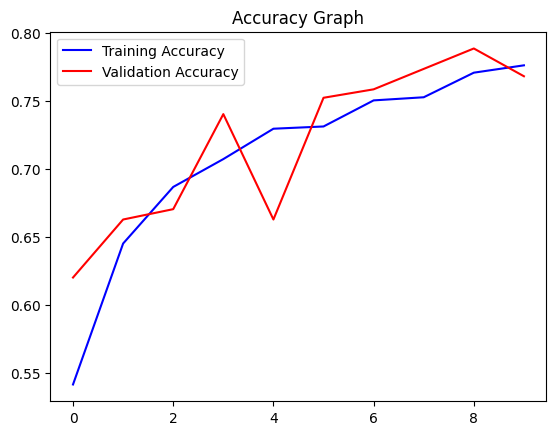

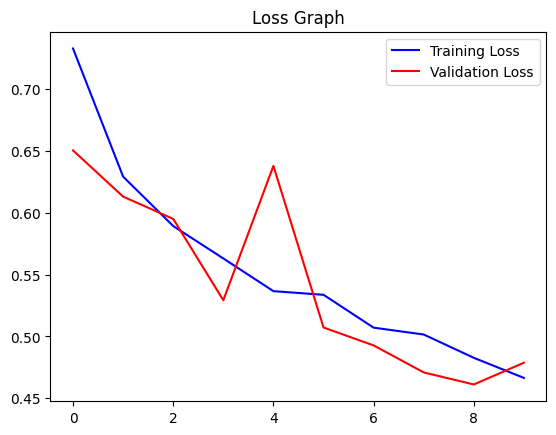

In [92]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [ ]:
image_path = "test.jpg" # path of the image
img = load_img(image_path, target_size=(128, 128))
img = np.array(img)
img = img / 255.0
img = img.reshape(1, 128, 128, 3)
pred = model.predict(img)
if pred[0] > 0.5:
    label = 'Dog'
else:
    label = 'Cat'
print(label)